#**Milestone-2, Baseline Model with Simple Neural Network**

This baseline notebook includes drive mounting, loading the data into the dataframe, and then processing the dataframe to create a new column called **'Demand'** by grouping on the features **'start_day_of_the_week', 'start_hour', and 'end_station_name'**. Following this, we selected the necessary features and defined them in the **X and Y dataframes**. The objective is to predict **'demand'** based on the features **'rideable_type', 'start_lat', 'start_long', 'end_lat', 'end_long', 'member_casual', 'start_month', 'stop_month', 'start_day_of_the_week', 'stop_day_of_the_week', 'start_hour', 'stop_hour', and 'trip_duration_minute'**. **We have applied one-hot encoding to 'rideable_type' and 'member_casual'**. As we consider the start and end latitude and longitude, the start and end station names have been omitted. Subsequently, we ran a simple neural network with **two fully connected layers using a ReLU activation function** to make predictions for the demand of end stations and plotted the graph accordingly.

In [ ]:
# Import necessary library
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import torch
import torch.nn as nn
import torch.optim as optim
# from torch_geometric.data import Data
# from torch_geometric.nn import GCNConv
# import dgl
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler


Mounting the drive and reading the data to store it in the dataframe **df and df1**

In [ ]:
drive.mount('/content/drive')
# path = f'/content/drive/My Drive/IE434_Deep_Learning/Data_extraction/merged_pkl_data_file(worked2).pkl'
path1= f'/content/drive/My Drive/IE434_Deep_Learning/Data_extraction/merged_pkl_data_file_original.pkl'
# dfor= pd.read_pickle(path1)
df = pd.read_pickle(path1)
df1=pd.read_pickle(path1)

Mounted at /content/drive


In [ ]:
df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528299,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190
1528300,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194
1528301,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159
1528302,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155


In the below cell, we are creating a dataframe **result_df** by grouping with the feature varaibles**'start_day_of_week', 'start_hour' and 'end_station_name'**.



In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame named 'df'
# If your data is in a CSV file, you can read it using: df = pd.read_csv('your_file.csv')

# Group by start_day_of_week, start_hour, and end_station_name and calculate demand
grouped_df = df.groupby(['start_day_of_week', 'start_hour', 'end_station_name']).size().reset_index(name='demand')

# Merge the grouped information back to the original DataFrame based on the groupby columns
result_df = pd.merge(df, grouped_df, on=['start_day_of_week', 'start_hour', 'end_station_name'], how='left')


In [ ]:
result_df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168,537
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164,631
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181,565
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172,605
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190,147
1521596,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194,24
1521597,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159,147
1521598,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155,82


In [ ]:
#Perform one-hot encoding for each categorical column
df_one_hot = pd.get_dummies(result_df, columns=['rideable_type', 'member_casual' ])

In [ ]:
df_one_hot

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_Customer,member_casual_member
0,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,3,3,4,4,15,15,-0.033168,537,1,0,0,1,0
1,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,16,16,-0.037164,631,0,0,1,0,1
2,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,17,17,-0.021181,565,0,0,1,0,1
3,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,15,15,-0.029172,605,1,0,0,0,1
4,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,12,12,-0.013190,414,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,9,9,4,4,21,22,-0.013190,147,0,0,1,1,0
1521596,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,9,9,6,6,17,18,-0.009194,24,1,0,0,0,1
1521597,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,2,2,16,16,-0.041159,147,0,0,1,0,1
1521598,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,1,1,11,11,-0.045155,82,1,0,0,0,1


Normalizing the 'demand' feature.

In [ ]:
# Assuming you have a DataFrame 'df' with the specified columns
columns_to_normalize = ['demand']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the specified columns
df_one_hot[columns_to_normalize] = scaler.fit_transform(df_one_hot[columns_to_normalize])

In [ ]:
df_one_hot

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_Customer,member_casual_member
0,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,3,3,4,4,15,15,-0.033168,0.257321,1,0,0,1,0
1,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,16,16,-0.037164,0.302448,0,0,1,0,1
2,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,17,17,-0.021181,0.270763,0,0,1,0,1
3,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,15,15,-0.029172,0.289966,1,0,0,0,1
4,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,12,12,-0.013190,0.198272,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,9,9,4,4,21,22,-0.013190,0.070091,0,0,1,1,0
1521596,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,9,9,6,6,17,18,-0.009194,0.011042,1,0,0,0,1
1521597,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,2,2,16,16,-0.041159,0.070091,0,0,1,0,1
1521598,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,1,1,11,11,-0.045155,0.038886,1,0,0,0,1


In [ ]:
columns=['start_station_name',	'end_station_name', 'demand']
X = df_one_hot.drop(columns=columns)
Y = df_one_hot['demand']

In [ ]:
X.shape[1]

16

Running the first simple Neural Network to predict the demand with a set of hyperparameters.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_np, dtype=torch.float32)

# Assuming you have X_train_tensor, Y_train_tensor, X_test_tensor, and Y_test_tensor as PyTorch tensors
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

# Hyperparameters
input_size = X.shape[1]  # Replace with the actual input size
hidden_size = 50
output_size = 1
lr = 0.001
epochs = 10
train1_losses = []
batch_size= 32

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train1_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

# Evaluation on test set
model.eval()
with torch.no_grad():
    test_losses = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        test_loss = criterion(outputs, labels)
        test_losses.append(test_loss.item() * inputs.size(0))
    test_loss = sum(test_losses) / len(test_loader.dataset)
    print(f'Mean Squared Error on Test Set: {test_loss:.4f}')

Epoch [1/10], Loss: 0.0152
Epoch [2/10], Loss: 0.0119
Epoch [3/10], Loss: 0.0117
Epoch [4/10], Loss: 0.0103
Epoch [5/10], Loss: 0.0099
Epoch [6/10], Loss: 0.0096
Epoch [7/10], Loss: 0.0094
Epoch [8/10], Loss: 0.0094
Epoch [9/10], Loss: 0.0093
Epoch [10/10], Loss: 0.0091
Mean Squared Error on Test Set: 0.0088


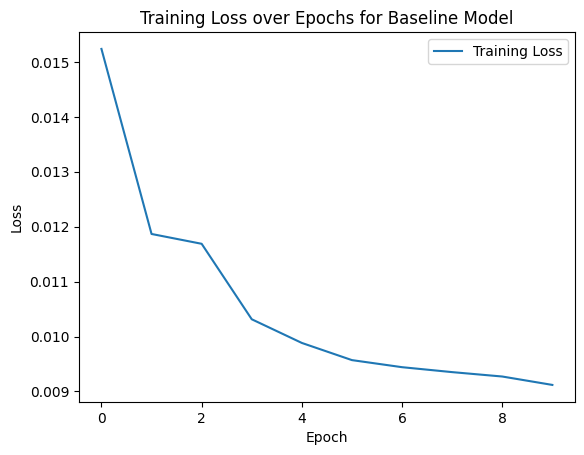

In [ ]:
# Plotting the training loss curve
plt.plot(train1_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for Baseline Model')
plt.legend()
plt.show()

Running the second simple Neural Network to predict the demand with different set of hyperparameters.

In [ ]:
# Hyperparameters
input_size = X.shape[1]  # Replace with the actual input size
hidden_size = 100
output_size = 1
lr = 0.1
epochs = 15
train2_losses = []
batch_size= 64

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train2_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

# Evaluation on test set
model.eval()
with torch.no_grad():
    test_losses = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        test_loss = criterion(outputs, labels)
        test_losses.append(test_loss.item() * inputs.size(0))
    test_loss = sum(test_losses) / len(test_loader.dataset)
    print(f'Mean Squared Error on Test Set: {test_loss:.4f}')


Epoch [1/15], Loss: 10.8896
Epoch [2/15], Loss: 0.2430
Epoch [3/15], Loss: 0.0158
Epoch [4/15], Loss: 0.0159
Epoch [5/15], Loss: 0.0159
Epoch [6/15], Loss: 0.0158
Epoch [7/15], Loss: 0.0159
Epoch [8/15], Loss: 0.0159
Epoch [9/15], Loss: 0.0159
Epoch [10/15], Loss: 0.0159
Epoch [11/15], Loss: 0.0159
Epoch [12/15], Loss: 0.0159
Epoch [13/15], Loss: 0.0159
Epoch [14/15], Loss: 0.0159
Epoch [15/15], Loss: 0.0158
Mean Squared Error on Test Set: 0.0157


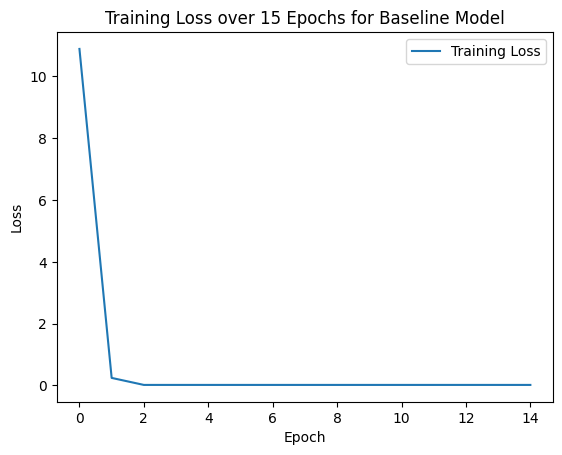

In [ ]:
# Plotting the training loss curve
plt.plot(train2_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over 15 Epochs for Baseline Model')
plt.legend()
plt.show()